In [1]:
"""
Python可视化21|Seaborn.catplot(上)-小提琴图等四类图
原创 pythonic生物人 pythonic生物人 2020-08-17 07:32

本文介绍seaborn.catplot函数可视化分类数据，涉及如下8种图，更换父类catplot中的kind参数即可，也可使用对应的子函数如下：

stripplot()，此时(kind="strip"，默认)；
swarmplot()，此时(kind="swarm")
boxplot()，此时(kind="box")；
violinplot()，此时(kind="violin")；
boxenplot()，此时(kind="boxen")
pointplot()，此时(kind="point")；
barplot()，此时(kind="bar")；
countplot()，此时(kind="count")
每类图函数都有自己独特的参数，本文主要介绍前四类图。

1、seaborn.catplot简介
2、绘图数据集准备
3、seaborn.stripplot（分类散点图）
 stripplot不分类散点图
 stripplot分类散点图
 设置点的属性 
 多重分类 
 catplot()结合stripplot和FacetGrid分图显示
4、seaborn.swarmplot（成簇散点图）
 swarmplot不分类散点图
 设置点的属性 
5、seaborn.boxplot（箱图或箱线图）
6、seaborn.violinplot（小提琴图）
 不分类小提琴图
 分类小提琴图 
 inner参数 
 多重分类小提琴图 
 多重分类左右显示小提琴图
"""
import warnings
warnings.filterwarnings("ignore")

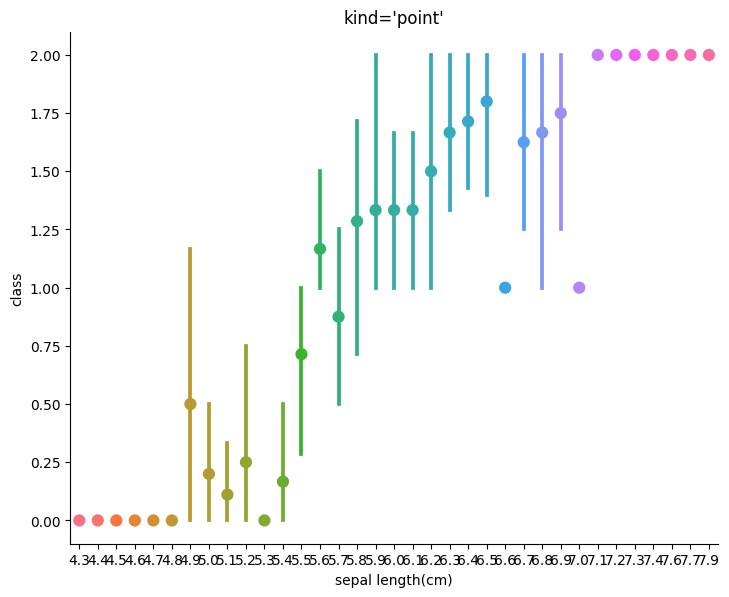

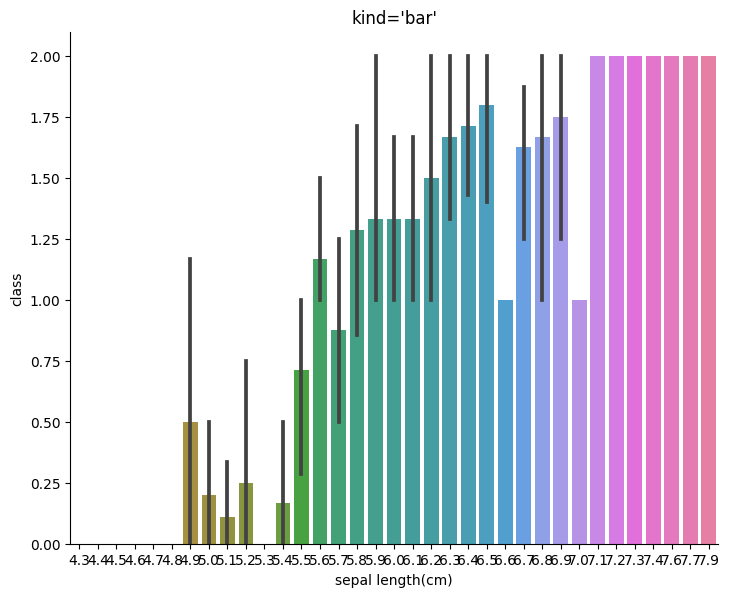

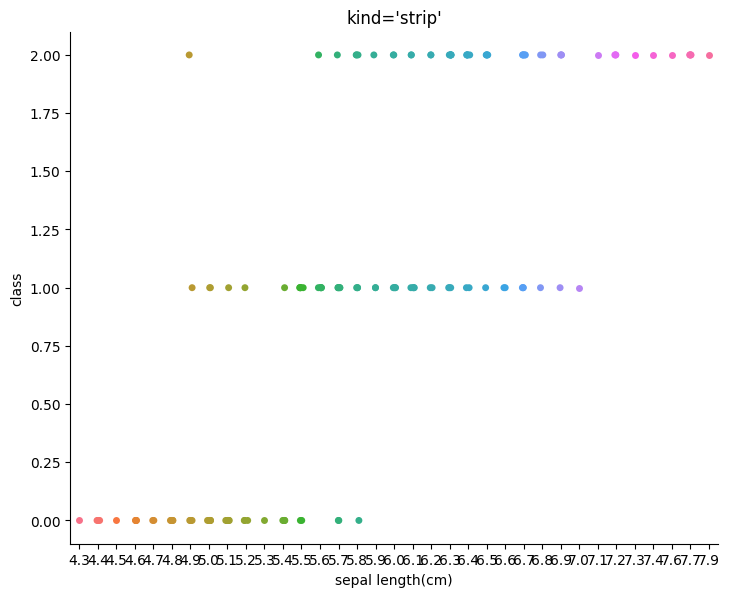

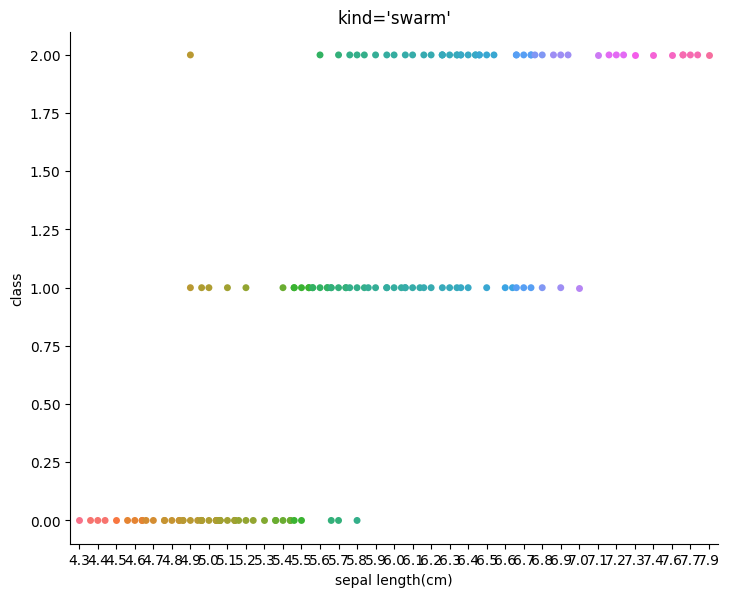

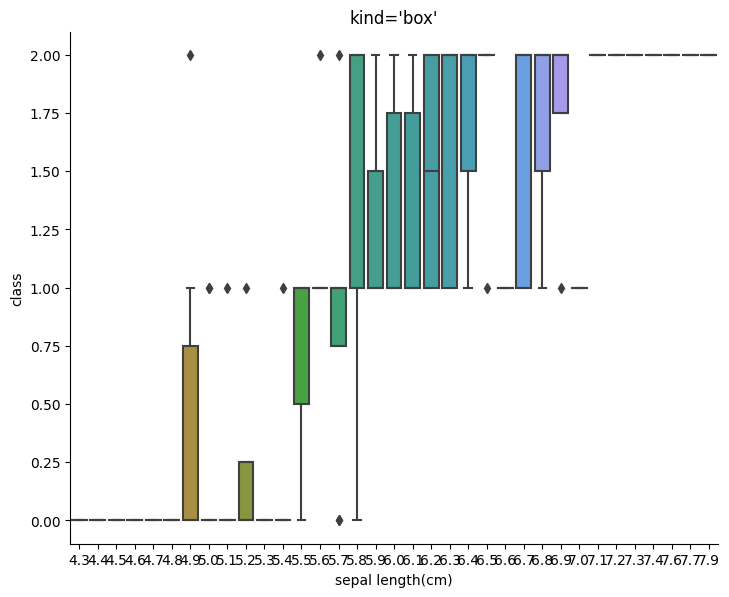

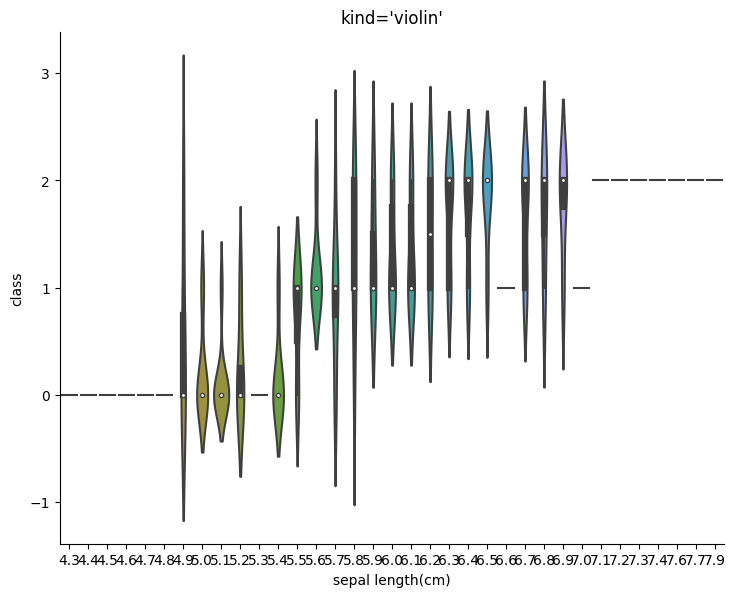

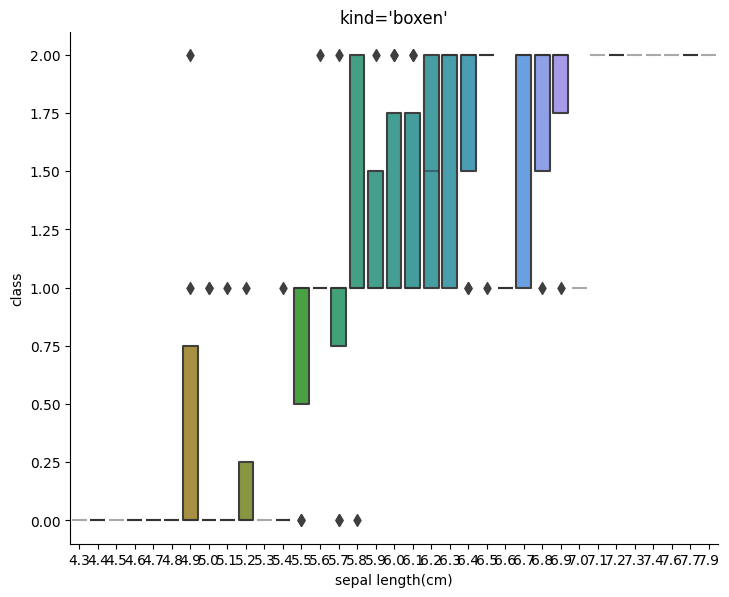

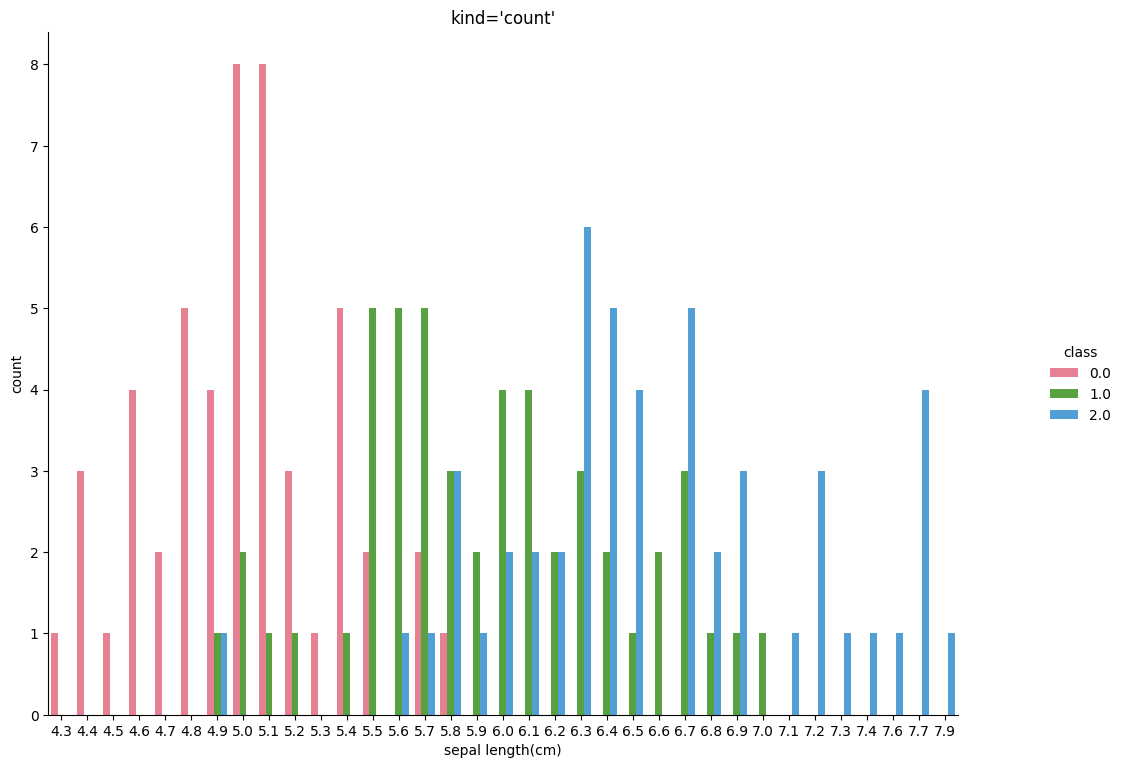

In [7]:
"""
1、seaborn.catplot简介
实用场景：categorical data, one of the main variables is “categorical” (divided into discrete groups)
语法：seaborn.catplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x105c7d9e0>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)
seaborn.catplot可分3大类，更细分8小类：
分类散点图， stripplot()，此时(kind="strip"，默认)；swarmplot()，此时(kind="swarm")
分类分布图， boxplot()，此时(kind="box")；violinplot()，此时(kind="violin")；boxenplot()，此时(kind="boxen")
分类估计图， pointplot()，此时(kind="point")；barplot()，此时(kind="bar")；countplot()，此时(kind="count")

8类图长什么样子？(以下绘图使用鸢尾花数据集)
"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
iris=datasets.load_iris()
x, y =iris.data,iris.target
pd_iris = pd.DataFrame(np.hstack((x, y.reshape(150,1))),
                       columns=['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)','class'])

for i in  list("point, bar, strip, swarm, box, violin, boxen".split(', ')):
    g=sns.catplot(x='sepal length(cm)', y='class', data=pd_iris, kind='%s'%i,
                  palette='husl',
                 )
    plt.title("kind='%s'"%i)
    g.fig.set_size_inches(8,6)#设置图形大小
    
g=sns.catplot(x='sepal length(cm)', hue='class', data=pd_iris, kind='count',
              palette='husl',
             )
plt.title("kind='count'")
g.fig.set_size_inches(12,8)

In [8]:
"""
2、绘图数据集准备
还是使用鸢尾花iris数据集：Python可视化|matplotlib10-绘制散点图scatter
"""
#导入本帖要用到的库，声明如下：
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import palettable
from pandas import Series,DataFrame
from sklearn import datasets
import seaborn as sns
import palettable
#导入鸢尾花iris数据集（方法一）
#该方法更有助于理解数据集
iris=datasets.load_iris()
x, y =iris.data,iris.target
y_1 = np.array(['setosa' if i==0 else 'versicolor' if i==1 else 'virginica' for i in y])
pd_iris = pd.DataFrame(np.hstack((x, y_1.reshape(150,1))),columns=['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)','class'])

#astype修改pd_iris中数据类型object为float64
pd_iris['sepal length(cm)']=pd_iris['sepal length(cm)'].astype('float64')
pd_iris['sepal width(cm)']=pd_iris['sepal width(cm)'].astype('float64')
pd_iris['petal length(cm)']=pd_iris['petal length(cm)'].astype('float64')
pd_iris['petal width(cm)']=pd_iris['petal width(cm)'].astype('float64')

pd_iris.head()

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot: xlabel='sepal length(cm)'>

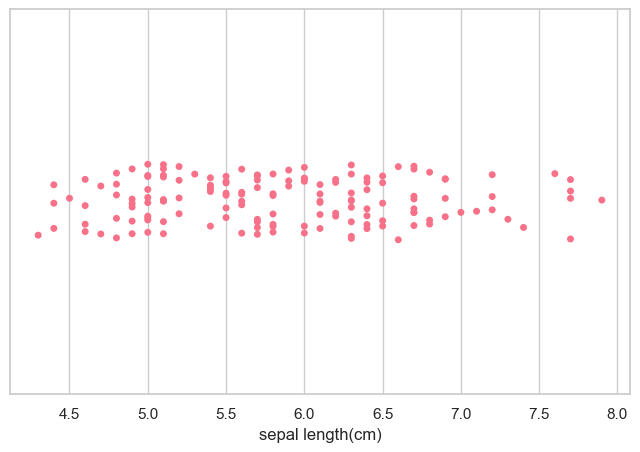

In [9]:
"""
3、seaborn.stripplot（分类散点图）
使用场景：两个变量，有一个是分类变量
语法：seaborn.stripplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, jitter=True, 
dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)

stripplot不分类散点图
"""
#stripplot不分类散点图
plt.figure(figsize=(8,5))
sns.set(style="whitegrid")
sns.stripplot(x='sepal length(cm)',data=pd_iris,#传入数据pd_iris第一列
              palette='husl',)

<AxesSubplot: xlabel='class', ylabel='sepal length(cm)'>

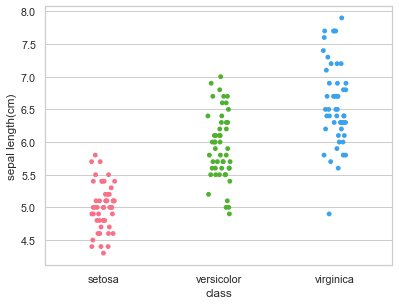

In [10]:
"""
stripplot分类散点图
"""
#stripplot分类散点图
plt.figure(dpi=70)
sns.set(style="whitegrid")
sns.stripplot(y='sepal length(cm)',x='class',data=pd_iris,#传入数据pd_iris第一列及最后一列
              palette='husl',
             )

<AxesSubplot: xlabel='class', ylabel='sepal length(cm)'>

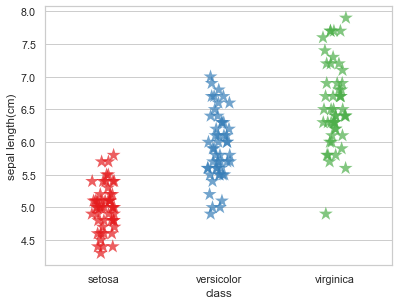

In [11]:
"""
设置点的属性
"""
#设置点的属性
plt.figure(dpi=70)
sns.set(style="whitegrid")
sns.stripplot(y='sepal length(cm)',x='class',data=pd_iris,
              palette='Set1', 
              #marker='*',#也可如下修改marker
              **dict(marker='*',s=15,alpha=0.7),#设置点形状、大小、透明度等，更多见matplotlib.axes.Axes.scatter
             )

In [12]:
"""
多重分类
"""
#给数据加一列花期（上、下旬）
flowering=pd.Series(['early' if i>4.0 and i<5.0 else 'middle' for i in pd_iris['sepal length(cm)']])
pd_iris1=pd.concat([pd_iris,flowering],axis=1)#拼接，默认按行拼接，即axis=0
pd_iris1.rename(columns={0:'flowering'}, inplace = True)#替换列名称
pd_iris1.head()

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm),class,flowering
0,5.1,3.5,1.4,0.2,setosa,middle
1,4.9,3.0,1.4,0.2,setosa,early
2,4.7,3.2,1.3,0.2,setosa,early
3,4.6,3.1,1.5,0.2,setosa,early
4,5.0,3.6,1.4,0.2,setosa,middle


<AxesSubplot: xlabel='class', ylabel='sepal length(cm)'>

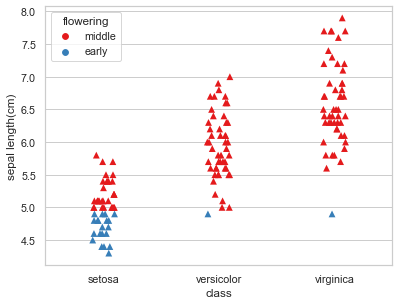

In [13]:
#class类下再按照flowering分类
plt.figure(dpi=70)
sns.set(style="whitegrid")
sns.stripplot(y='sepal length(cm)',x='class',hue='flowering',data=pd_iris1,#hue='flowering'添加子类
              palette='Set1',
              **dict(marker='^',s=7)              
              
             )

<Figure size 1200x500 with 0 Axes>

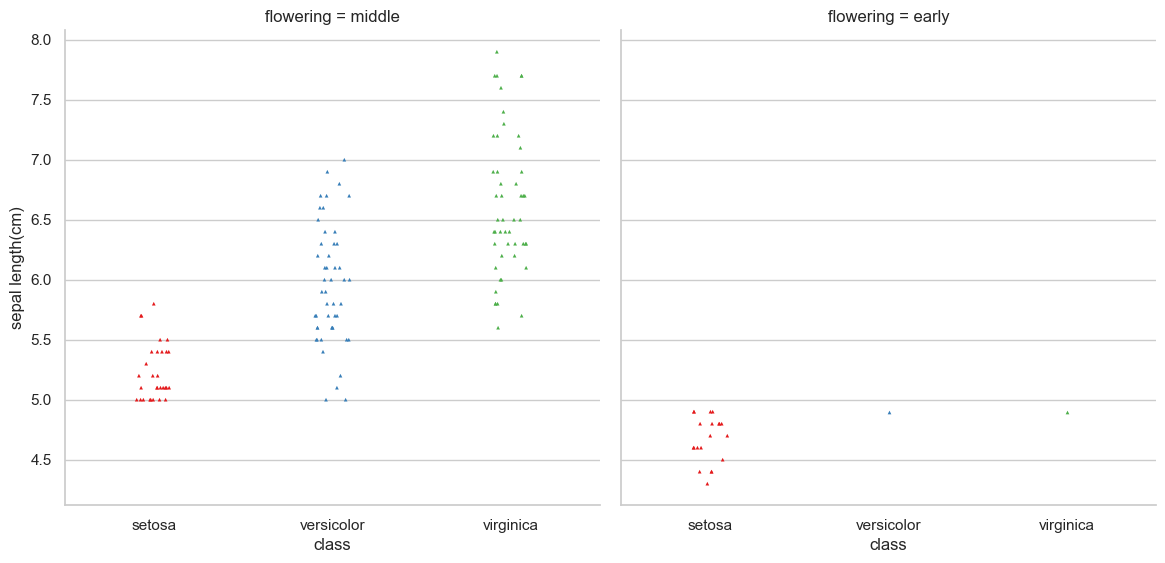

In [14]:
"""
catplot()结合stripplot和FacetGrid分图显示
"""
##使用catplot()结合 barplot()和FacetGrid分图显示
plt.figure(figsize=(12,5))
sns.set(style="whitegrid")
g=sns.catplot(y='sepal length(cm)',x='class',col='flowering',data=pd_iris1,#col='flowering'
              palette='Set1',
              **dict(marker='^',s=7)             
             )
g.fig.set_size_inches(12,6)

<AxesSubplot: xlabel='sepal length(cm)'>

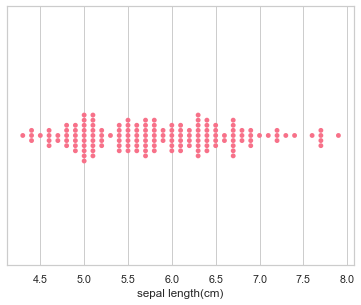

In [15]:
"""
4、seaborn.swarmplot（成簇散点图）
使用场景：与stripplot()类似，只是swarmplot中数据点经过了成簇处理
【the points are adjusted (only along the categorical axis) so that they don’t overlap.】，是数据点不重叠的stripplot()
语法：seaborn.swarmplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, dodge=False, orient=None, 
color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)参数和stripplot()一样，简单介绍下。

swarmplot不分类散点图
"""
#swarmplot不分类散点图
plt.figure(dpi=70)
sns.set(style="whitegrid")
sns.swarmplot(x='sepal length(cm)',data=pd_iris,#传入数据pd_iris第一列
              palette='husl',
             )

<AxesSubplot: xlabel='class', ylabel='sepal length(cm)'>

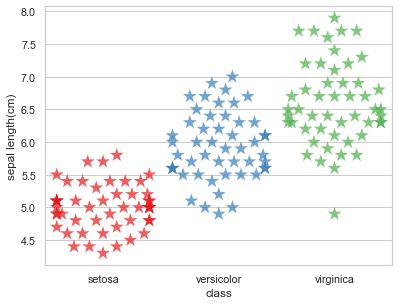

In [16]:
"""
设置点的属性
"""
#设置点的属性
plt.figure(dpi=70)
sns.set(style="whitegrid")
sns.swarmplot(y='sepal length(cm)',x='class',data=pd_iris,
              palette='Set1', 
              #marker='*',#也可如下修改marker
              **dict(marker='*',s=15,alpha=0.7),#设置点形状、大小、透明度等，更多见matplotlib.axes.Axes.scatter
             )

<AxesSubplot: ylabel='sepal length(cm)'>

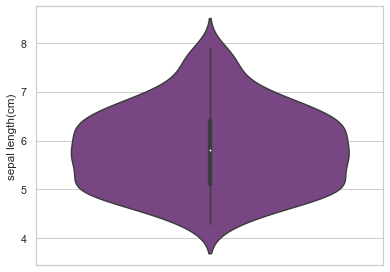

In [17]:
"""
5、seaborn.boxplot**（箱图或箱线图）**
详细见：Python可视化17seaborn-箱图boxplot

6、seaborn.violinplot（小提琴图）
更多可参考：Python可视化17seaborn-箱图boxplot
语法：seaborn.violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)
以下介绍部分特异参数。

不分类小提琴图
"""
#sepal length(cm)不分类小提琴图
plt.figure(dpi=70)
sns.set(style="whitegrid")
sns.violinplot(y='sepal length(cm)',data=pd_iris,#传入数据pd_iris第一列
              palette=palettable.cartocolors.qualitative.Bold_9.mpl_colors,
             )

<AxesSubplot: xlabel='class', ylabel='sepal length(cm)'>

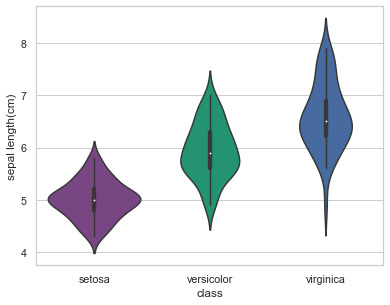

In [18]:
"""
分类小提琴图
"""
#按class分类小提琴图
plt.figure(dpi=70)
sns.set(style="whitegrid")
sns.violinplot(y='sepal length(cm)',x='class',data=pd_iris1,
              palette=palettable.cartocolors.qualitative.Bold_9.mpl_colors, 
             )

Text(0.5, 1.0, 'inner=None')

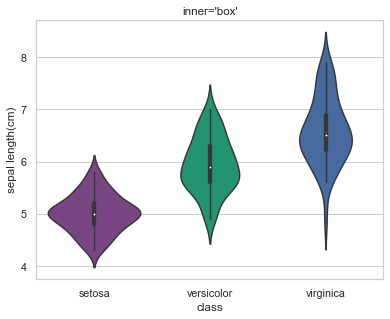

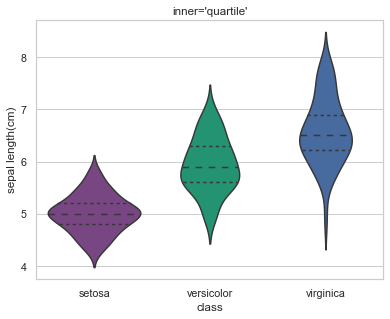

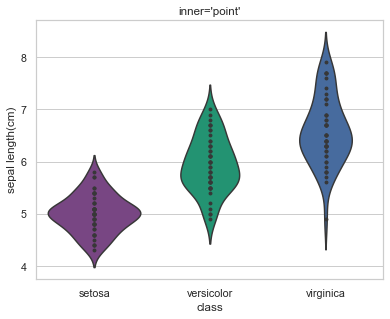

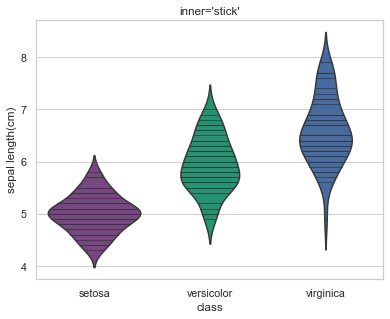

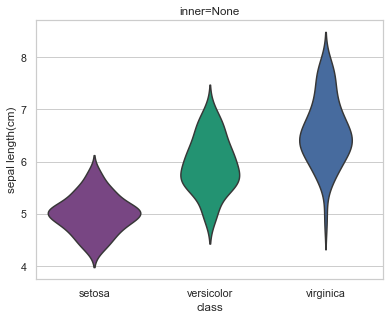

In [19]:
"""
inner参数
箱子中间图形显示模式
"""
#中间显示模式inner参数
for i in list('box,quartile,point,stick'.split(',')):
    plt.figure(dpi=70)
    sns.set(style="whitegrid")
    sns.violinplot(y='sepal length(cm)',x='class',data=pd_iris1,
                   palette=palettable.cartocolors.qualitative.Bold_9.mpl_colors,
                   inner='%s'%i,#可选{“box”（默认）, “quartile”, “point”, “stick”, None}
                  )
    plt.title("inner='%s'"%i)
    
plt.figure(dpi=70)
sns.set(style="whitegrid")
sns.violinplot(y='sepal length(cm)',x='class',data=pd_iris1,
               palette=palettable.cartocolors.qualitative.Bold_9.mpl_colors,
               inner=None,
              )
plt.title("inner=None")

<AxesSubplot: xlabel='class', ylabel='sepal length(cm)'>

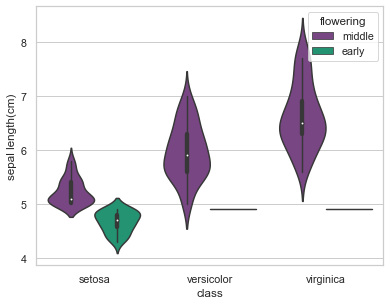

In [20]:
"""
多重分类小提琴图
"""
#按class分类后再按flowering分类小提琴图
plt.figure(dpi=70)
sns.set(style="whitegrid")
sns.violinplot(y='sepal length(cm)',x='class',hue='flowering',data=pd_iris1,
              palette=palettable.cartocolors.qualitative.Bold_9.mpl_colors, 
             )

<AxesSubplot: xlabel='class', ylabel='sepal length(cm)'>

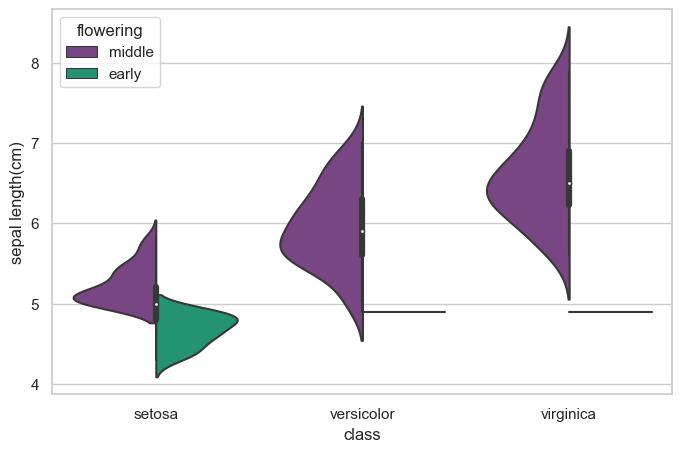

In [21]:
"""
多重分类左右显示小提琴图
"""
#按class分类后再按flowering分类左右显示小提琴图
plt.figure(figsize=(8,5))
sns.set(style="whitegrid")
sns.violinplot(y='sepal length(cm)',x='class',hue='flowering',data=pd_iris1,
              palette=palettable.cartocolors.qualitative.Bold_9.mpl_colors,
               split=True#左右显示flowering分类
             )

In [ ]:
"""
参考资料
http://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot
同系列文章
Python可视化17seborn-箱图boxplot
Python可视化20|Seaborn散点图&&折线图
"""